In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from drawdata import ScatterWidget

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim

plt.style.use('../mpl styles/dracula.mplstyle')

In [274]:
widget = ScatterWidget()
widget

ScatterWidget()

In [275]:
raw_dataset = widget.data_as_pandas

In [276]:
data = raw_dataset[['x', 'y']]

In [277]:
def predict(model, X):
    model.eval()
    with torch.no_grad():
        return model(X).numpy()

In [278]:
data.head()

,x,y
0,165.183908,102.046411
1,186.313963,104.396156
2,168.462874,102.153408
3,176.344720,109.886342
4,193.418057,130.052477


<Axes: xlabel='x', ylabel='y'>

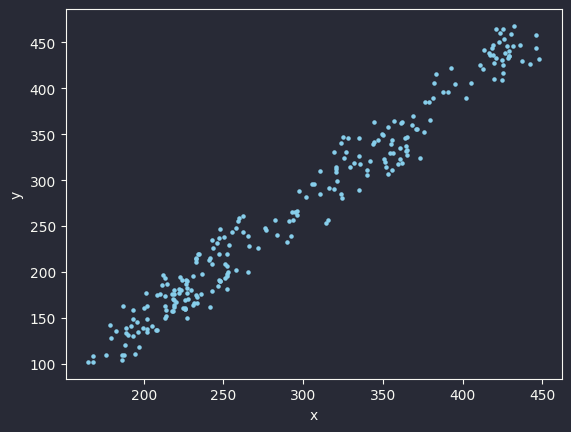

In [280]:
data.plot.scatter(x='x', y='y', marker='.', color='skyblue')

In [281]:
X = torch.tensor(data[['x']].to_numpy(), dtype=torch.float)
y = torch.tensor(data[['y']].to_numpy(), dtype=torch.float)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, len(dataset))

Epoch 1/10000: Loss = 82,479.9062
Epoch 2/10000: Loss = 82,422.5625
Epoch 3/10000: Loss = 82,365.2812
Epoch 4/10000: Loss = 82,308.0469
Epoch 5/10000: Loss = 82,250.8594
Epoch 6/10000: Loss = 82,193.7109
Epoch 7/10000: Loss = 82,136.6172
Epoch 8/10000: Loss = 82,079.5547
Epoch 9/10000: Loss = 82,022.5469
Epoch 10/10000: Loss = 81,965.5781
Epoch 11/10000: Loss = 81,908.6719
Epoch 12/10000: Loss = 81,851.8047
Epoch 13/10000: Loss = 81,794.9688
Epoch 14/10000: Loss = 81,738.1875
Epoch 15/10000: Loss = 81,681.4453
Epoch 16/10000: Loss = 81,624.7578
Epoch 17/10000: Loss = 81,568.1172
Epoch 18/10000: Loss = 81,511.5156
Epoch 19/10000: Loss = 81,454.9688
Epoch 20/10000: Loss = 81,398.4531
Epoch 21/10000: Loss = 81,341.9922
Epoch 22/10000: Loss = 81,285.5625
Epoch 23/10000: Loss = 81,229.1953
Epoch 24/10000: Loss = 81,172.8594
Epoch 25/10000: Loss = 81,116.5859
Epoch 26/10000: Loss = 81,060.3516
Epoch 27/10000: Loss = 81,004.1562
Epoch 28/10000: Loss = 80,948.0000
Epoch 29/10000: Loss = 80,891

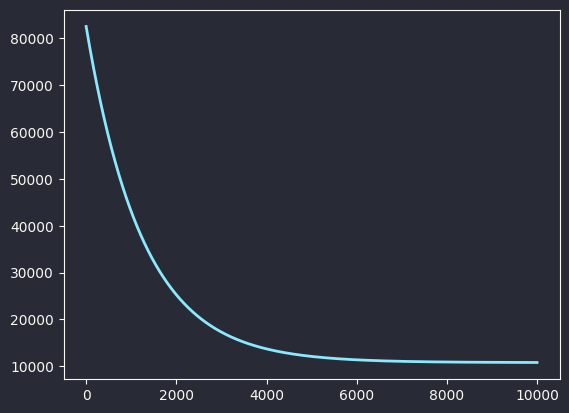

In [303]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid(),
    nn.Linear(1, 1),
)


criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)
epochs = 10000

losses = []
for epoch in range(1, epochs + 1):
    cost = 0
    model.train()
    for x, y in dataloader:
        yhat = model(x)
        optimizer.zero_grad()
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        
        cost += loss.item()
        
    cost /= len(dataloader)
    losses.append(cost)
    print(f"Epoch {epoch}/{epochs}: Loss = {cost:,.4f}")


plt.plot(losses, linewidth=2, )

10828.139981778304


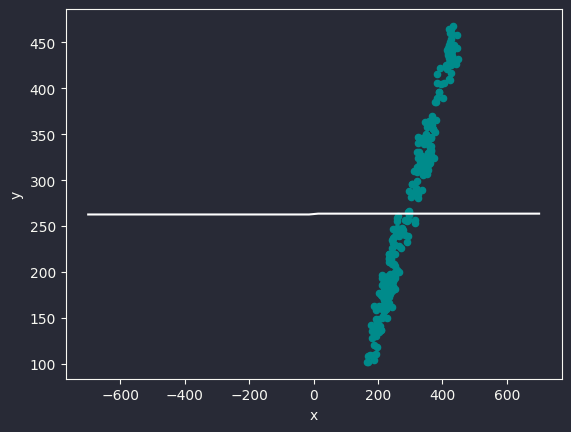

In [314]:
y_pred = predict(model, X)

print(mean_squared_error(data['y'], y_pred))

data.plot.scatter(x='x', y='y', color='darkcyan')

x = torch.tensor(np.linspace(-700, 700), dtype=torch.float).reshape(-1, 1)

plt.plot(x, predict(model, x), color='white')